In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("music-genre-cleaned-2.csv")
# Cleaned in OpenRefine. Removed duplicates (5), not-useful predictors (3), 
# `?` tempo values (4980), and songs with negative duration (4460). 
df

,Column,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,1,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
1,2,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
2,3,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
3,4,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
4,6,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,49999,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,0.629,Hip-Hop
40556,50001,72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.043,0.113,Hip-Hop
40557,50002,51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
40558,50003,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.886,0.354,Hip-Hop


## Dataset overview

In [6]:
df.describe()

,Column,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,40560.000000,40560.000000,40560.000000,40560.000000,4.056000e+04,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000,40560.000000
mean,25031.861144,44.276677,0.305974,0.558418,2.454895e+05,0.600330,0.181603,0.193820,-9.126369,0.093738,119.874523,0.456921
std,14436.974195,15.545617,0.341108,0.178652,1.101214e+05,0.264501,0.325710,0.161501,6.154679,0.101502,30.653215,0.246942
min,1.000000,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,12535.750000,34.000000,0.020000,0.442000,1.904800e+05,0.433000,0.000000,0.097000,-10.843000,0.036100,94.893000,0.259000
50%,25029.500000,45.000000,0.144000,0.569000,2.275330e+05,0.644000,0.000157,0.126000,-7.277000,0.048900,119.755500,0.449000
75%,37536.250000,56.000000,0.550000,0.687000,2.757600e+05,0.817000,0.152000,0.244000,-5.174000,0.098800,140.344000,0.648000
max,50004.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


In [9]:
df.describe(include=['O'])

,key,mode,music_genre
count,40560,40560,40560
unique,12,2,10
top,G,Major,Rock
freq,4630,25959,4099


After cleaning the original dataset in OpenRefine, there are 14 predictor variables, 2 of which are categorical and 12 of which are numerical. 

Text(0.5, 1.0, 'Counts for each genre')

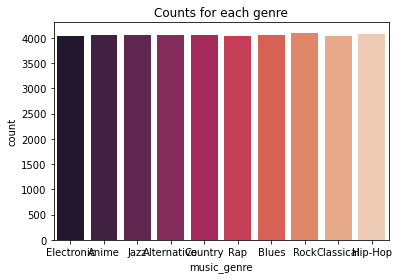

In [11]:
# Checking if outcome is evenly distributed
sns.countplot(x="music_genre", data=df, palette="rocket", order=None)
plt.title("Counts for each genre")

For each genre, the distribution of the counts are maintained as roughly the same after cleaning at around 4,000 per genre. As such, the accuracy metric would be a reasonable metric to use for measuring the performance of our models. 

# Exploring some predictors

### Popularity

In [13]:
df.groupby("music_genre")["popularity"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,50.238213,7.619584,0.0,45.0,49.0,55.0,83.0
Anime,4064.0,24.273130,9.688895,0.0,17.0,23.0,30.0,65.0
Blues,4046.0,34.844785,9.759386,0.0,29.0,33.0,39.0,80.0
Classical,4036.0,29.305253,14.134019,0.0,25.0,32.0,38.0,68.0
Country,4049.0,46.026920,9.779411,0.0,39.0,44.0,52.0,82.0
Electronic,4032.0,38.264137,9.678761,0.0,32.0,37.0,44.0,96.0
Hip-Hop,4077.0,58.397842,8.295019,18.0,52.0,57.0,63.0,96.0
Jazz,4064.0,40.967766,9.447196,0.0,36.0,40.0,46.0,74.0
Rap,4042.0,60.589560,8.231855,17.0,54.0,59.0,65.0,99.0


Text(0.5, 1.0, 'Distribution of popularity for each genre')

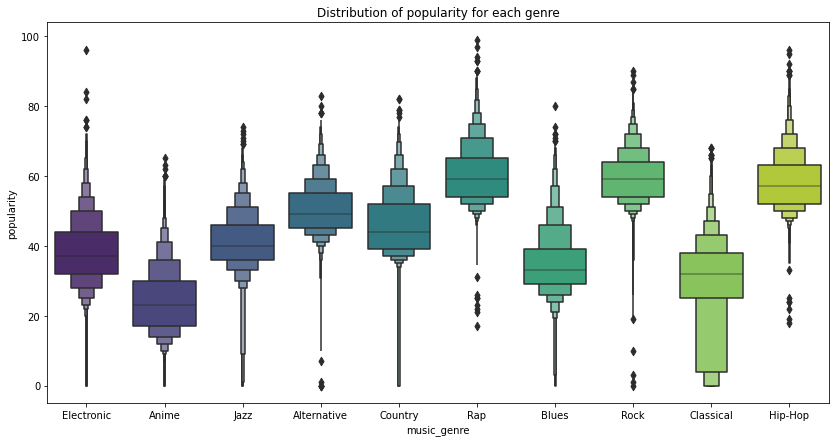

In [38]:
plt.figure(figsize=(14,7))
sns.boxenplot(data=df, x="music_genre", y="popularity", palette="viridis")
plt.title("Distribution of popularity for each genre")

The mean popularity values seem to vary between the different genres, indicating that it may be a valuable predictor in modeling. Rap, Rock, and Hip-Hop seem to be the most popular whereas Anime, Blues, and Classical seem to be less popular.

### Mode

In [25]:
df.groupby("music_genre")["mode"].describe(include=["O"])

,count,unique,top,freq
music_genre,,,,
Alternative,4051,2,Major,2551
Anime,4064,2,Major,2524
Blues,4046,2,Major,2878
Classical,4036,2,Major,2683
Country,4049,2,Major,3524
Electronic,4032,2,Major,2147
Hip-Hop,4077,2,Major,2272
Jazz,4064,2,Major,2136
Rap,4042,2,Major,2227


Text(0.5, 1.0, 'Counts of mode for each genre')

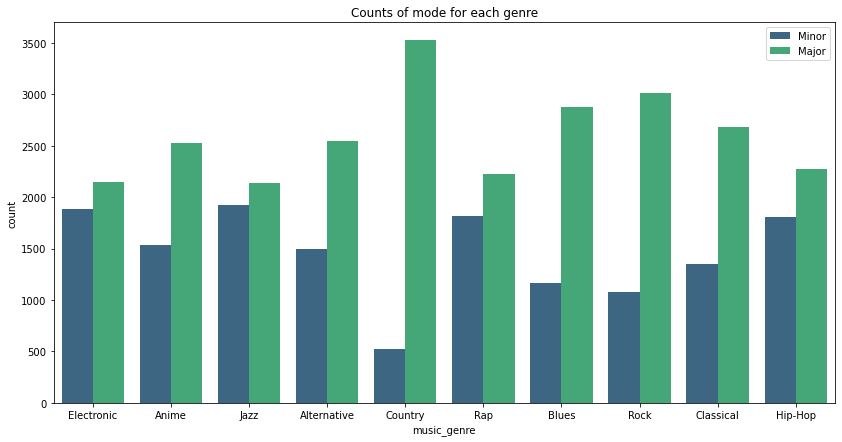

In [40]:
plt.figure(figsize=(14,7))
sns.countplot(data=df, x="music_genre", hue="mode", palette="viridis")
plt.legend(loc=0)
plt.title("Counts of mode for each genre")

The ratios of major and minor songs for each genre seem to be different, indicating that it could be a useful predictor. Country has a strong majority of its songs in major mode, whereas Rap, Hip-Hop, Jazz, and Electronic almost have equal ratios between major and minor modes. 


### Duration

In [46]:
df.groupby("music_genre")["duration_ms"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,233401.847692,60734.054291,24000.0,197612.00,226207.0,259721.00,675653.0
Anime,4064.0,231378.483760,84410.499218,30027.0,184935.25,239941.0,279069.50,1295600.0
Blues,4046.0,253432.844291,112627.425505,30097.0,186367.75,230346.5,287773.25,2019293.0
Classical,4036.0,310510.827552,211533.485083,15509.0,180280.25,262676.0,380024.50,3195440.0
Country,4049.0,216708.237837,44577.509817,56227.0,188500.00,211500.0,237162.00,599315.0
Electronic,4032.0,269823.285714,138608.890995,34289.0,206400.00,244965.5,309866.25,4497994.0
Hip-Hop,4077.0,219770.169733,59559.732159,33093.0,182582.00,215040.0,253333.00,723573.0
Jazz,4064.0,264350.728593,115035.635345,19693.0,189526.50,247682.0,313803.00,1352413.0
Rap,4042.0,219015.521524,57209.319792,59118.0,183483.50,214533.5,249666.75,579293.0


Text(0.5, 1.0, 'Distribution of duration (MS) for each genre')

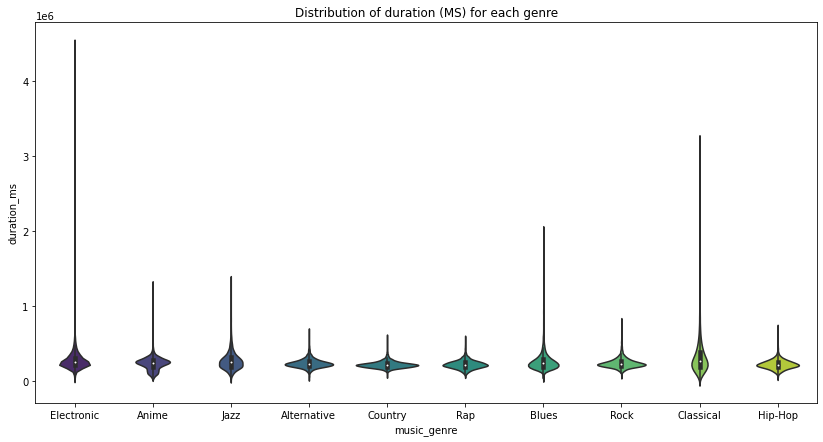

In [47]:
plt.figure(figsize=(14,7))
sns.violinplot(data=df, x="music_genre", y="duration_ms", palette="viridis")
plt.title("Distribution of duration (MS) for each genre")

Song durations have relatively similar means, indicating that it probably won't be that impactful in the final modeling. 

### Key

In [63]:
df.groupby("music_genre")["key"].describe(include=["O"])

,count,unique,top,freq
music_genre,,,,
Alternative,4051,12,G,456
Anime,4064,12,C,487
Blues,4046,12,G,609
Classical,4036,12,D,493
Country,4049,12,G,570
Electronic,4032,12,C#,576
Hip-Hop,4077,12,C#,769
Jazz,4064,12,F,503
Rap,4042,12,C#,723


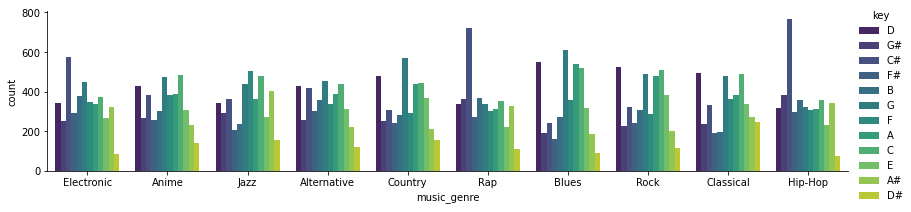

In [64]:
sns.catplot(x="music_genre",hue="key",kind="count",data=df,height=3,aspect=4.0,palette="viridis")

The spreads for each genre seems different but not super diversified. Could be a useful predictor, but not as useful as ones that we have previously examined. 

## Conclusions

Most genres have somewhat similar distributions for numeric and categorical variables, but with enough distinction to yield a somewhat accurate model. For some predictors, certain genres are outliers when compared to the rest, which makes us optimistic that our model will yield a somewhat viable result. 